In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal

plt.rcParams['figure.figsize'] = [20,35]

In [6]:
Sbox = (0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

Sbox = np.array(Sbox)

In [ ]:
def cor(x, y):
   
    meanX = np.mean(x)
    meanY = np.mean(y)
    x = x - meanX
    y = y - meanY
    cov = sum(x*y)
    meanQuadraticX = sum(x ** 2)
    meanQuadraticY = sum(y ** 2)
    res = cov / np.sqrt(meanQuadraticX * meanQuadraticY)
    return abs(res)


def cross_all_bytes(texts_out, byte_num, n):
   
    for hyp in range(256):
        leak_array = np.zeros(n)
        for _i in range(n):
            leak_array[_i] = hw[InvSbox[texts_out[_i][byte_num] ^ hyp]]
        yield hyp, leak_array

In [ ]:
def clean(tr, _b, _a):
    for _i in range(len(tr)):
        tr[_i] = signal.lfilter(_b, _a, tr[_i])
    return tr

In [2]:
np.load('textin.npy')
np.load('textout.npy')
np.load('traces.npy')

array([[-0.00097656, -0.14355469, -0.09472656, ..., -0.16992188,
        -0.02441406,  0.0625    ],
       [-0.00683594, -0.14941406, -0.09960938, ..., -0.16894531,
        -0.02636719,  0.06054688],
       [-0.0078125 , -0.15039062, -0.10058594, ..., -0.16699219,
        -0.0234375 ,  0.05957031],
       ...,
       [-0.00488281, -0.14648438, -0.09863281, ..., -0.16796875,
        -0.02636719,  0.05859375],
       [-0.00292969, -0.14550781, -0.09765625, ..., -0.16601562,
        -0.0234375 ,  0.06152344],
       [-0.00878906, -0.14648438, -0.10058594, ..., -0.16210938,
        -0.01953125,  0.06640625]])

In [3]:
textin = np.load('textin.npy')
textout = np.load('textout.npy')
traces = np.load('traces.npy')

num_traces = len((traces)[0] - 1)
num_samples = len((traces)[1])
num1_traces = np.transpose(traces)

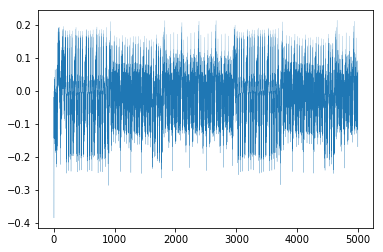

In [4]:
plt.plot(traces[0], linewidth=.2)
plt.show()

In [ ]:
def key_guesses_text(coefs, n=3):
    best_guesses = np.argsort(coefs)[::-1][:n]
    desc =[]
    tmpl = "key guess: %02x (%06f)" 
    for guess in np.nditer(best_guesses):
        desc.insert(0, tmpl % (guess, coefs[guess]))
    return ", ".join(desc)

key = np.zeros(16)

for key_byte_num in range(16):
    maxcpa = np.zeros(256)
    
    for key_guess in range(0, 256):
        
        hyp = np.zeros(traces)
        for tnum in range(traces):
            hyp[tnum] = leakage(textin[tnum][key_byte_num], key_guess)
        corr = correlation(hyp)
        maxcpa[key_guess] = corr
    key[key_byte_num] = np.argmax(maxcpa)
    print("Position #%02d: %s" % (key_byte_num, key_guesses_text(maxcpa)))

In [18]:
def cb (texts_in, byte_num, n):
    for hyp in range(256):
        la = np.zeros(n)
        for _i in range(n):                     
            la[_i] = hamming_weight[Sbox[texts_in[_i][byte_num] ^ hyp]]
        yield hyp, la

In [19]:
import numpy
numpy.corrcoef(num_traces, num_samples)

array([[nan, nan],
       [nan, nan]])